In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
# from sklearn.tree import convert_to_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz



%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

- `%matplotlib inline` → Permite mostrar gráficos directamente en **Jupyter Notebook**.
- `plt.rcParams['figure.figsize'] = (15, 9)` → Establece el tamaño predeterminado de los gráficos en 15x9 pulgadas.
- `plt.style.use('ggplot')` → Aplica el estilo de gráficos similar a **ggplot** (más limpio y atractivo).

In [25]:

iris = datasets.load_iris()
# print(iris)
print(iris.keys())

#Transformando a un dataframe de pandas
datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Cambiandole los nombres a las columnas
datos.columns=["Sepal.length","Sepal.width","Petal.length","Petal.width","Specie"]
datos

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,Sepal.length,Sepal.width,Petal.length,Petal.width,Specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


`np.c_` se usa para **concatenar dos listas en columnas** (`axis=1`).  

Luego, se define la lista de nombres de las columnas sumando los nombres originales de las características con el nombre de la variable objetivo.  

Por último, se **renombran los encabezados** para hacerlos más claros y fáciles de interpretar.

## Saber cuantas filas hay de cada categoría

In [26]:
datos.groupby('Specie').size()

Specie
0.0    50
1.0    50
2.0    50
dtype: int64

Se agrupan las "Specie" y se cuentan cuantos hay en cada grupo.

### Es importante saber que está balanceado el conjunto de datos en la variable de la respuesta

📌 **¿Qué significa?**  
- **Un conjunto de datos balanceado** significa que todas las clases en la variable objetivo (`Specie`) tienen un número similar de muestras.
- Si el dataset estuviera **desbalanceado**, un modelo de clasificación podría **favorecer la clase con más datos** y no aprender bien sobre las demás.

**¿Cómo verificarlo?**  
Se puede usar:
```python
datos['Specie'].value_counts()
```
Si cada especie tiene la misma cantidad de datos, el conjunto está **balanceado**.


In [27]:
datos['Specie'] = datos['Specie'].astype('category')
datos.dtypes

Sepal.length     float64
Sepal.width      float64
Petal.length     float64
Petal.width      float64
Specie          category
dtype: object

In [28]:
y = datos.pop("Specie") #La variable respuesta
X = datos #El resto de los datos

random.seed(123)




# Estableciendo los conjuntos de Entrenamiento y Prueba

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

 **📌 Explicación por partes**

- **`X`** → Variables independientes (características o "features").  
- **`y`** → Variable dependiente (etiquetas o "target").  
- **`test_size=0.3`** → El **30% de los datos** se reserva para pruebas.  
- **`train_size=0.7`** → El **70% de los datos** se usa para entrenamiento.  
- **`X_train`** → Datos de entrada para entrenar el modelo.  
- **`X_test`** → Datos de entrada para evaluar el modelo.  
- **`y_train`** → Etiquetas correspondientes a `X_train`.  
- **`y_test`** → Etiquetas correspondientes a `X_test`.  


70% de entrenamiento y 30% prueba

In [30]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

- **`DecisionTreeClassifier()`** → Crea un modelo de clasificación basado en Árboles de Decisión.
- **`max_depth=4`** → Establece la **profundidad máxima del árbol** en 4 niveles, limitando su complejidad.
- **`random_state=42`** → Fija una **semilla aleatoria** para garantizar que el modelo siempre se entrene igual en cada ejecución.

Finalmente se hace el entrenamiento con fit con el conjunto de datos correspondiente.

[Text(0.3333333333333333, 0.9, 'Petal.length <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [32, 36, 37]\nclass = 2'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = 0'),
 Text(0.25, 0.8, 'True  '),
 Text(0.5, 0.7, 'Petal.length <= 4.75\ngini = 0.5\nsamples = 73\nvalue = [0, 36, 37]\nclass = 2'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = 1'),
 Text(0.6666666666666666, 0.5, 'Petal.length <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 3, 37]\nclass = 2'),
 Text(0.5, 0.3, 'Sepal.width <= 3.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = 2'),
 Text(0.3333333333333333, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = 2'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = 2')]

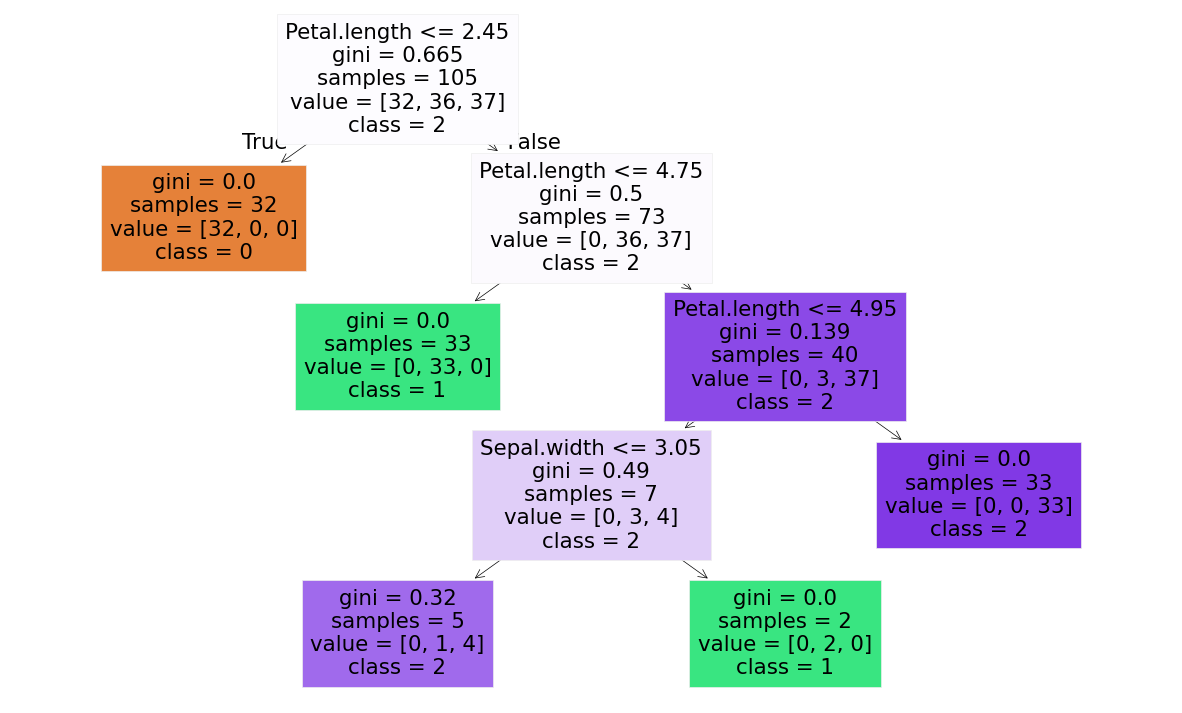

In [31]:
tree.plot_tree(arbol,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

## **Explicación del Diagrama**

**📌 Explicación por partes**
1. **`tree.plot_tree(arbol, ...)`**  
   - Dibuja el árbol de decisión entrenado (`arbol`).

2. **`feature_names=datos.columns`**  
   - Etiqueta las **ramas del árbol** con los nombres de las características (`Sepal.length`, `Sepal.width`, etc.).
   
3. **`class_names=['0', '1', '2']`**  
   - Asigna nombres a las clases (especies de flores en el dataset Iris).

4. **`filled=True`**  
   - Colorea los nodos según la clase predominante en cada uno, ayudando a visualizar la distribución de decisiones.

**📌 ¿Qué muestra la imagen del árbol?**
- **Los nodos muestran condiciones de división** (ejemplo: `Petal.length <= 2.45`).
- **Cada nodo contiene:**
  - `gini`: Nivel de pureza del nodo (0 = homogéneo, cercano a 1 = mezclado).
  - `samples`: Número de muestras en ese nodo.
  - `value`: Distribución de clases en el nodo.
  - `class`: Clase mayoritaria en el nodo.
- **Los colores representan las clases predominantes** en cada nodo.

### **1️⃣ ¿Qué es `gini`?**
El **índice de Gini** mide la pureza de un nodo en el árbol de decisión.  
- **Si `gini = 0`**, el nodo es **puro** (todas las muestras pertenecen a la misma clase).  
- **Si `gini` se acerca a 1**, el nodo está **mezclado** (las muestras están distribuidas entre varias clases).

**Fórmula del índice de Gini:**
$$
Gini = 1 - \sum (p_i)^2
$$
Donde $p_i$ es la proporción de cada clase en el nodo.

📌 **Ejemplo:**
- Un nodo con solo **setosa (clase 0)** tendrá `gini = 0.0` (puro).
- Un nodo con 50% **setosa (0)** y 50% **versicolor (1)** tendrá `gini = 0.5` (impuro).

### **2️⃣ ¿Qué es `samples`?**
Indica **cuántas muestras (filas del dataset)** hay en el nodo actual.

📌 **Ejemplo:**
Si `samples = 40`, significa que **40 datos llegaron a ese nodo** tras las divisiones del árbol.

### **3️⃣ ¿Qué es `value`?**
Es una lista con la cantidad de muestras de cada clase en el nodo.

📌 **Ejemplo:**
Si `value = [0, 3, 37]` significa:
- **0 muestras de la clase 0** (Setosa).
- **3 muestras de la clase 1** (Versicolor).
- **37 muestras de la clase 2** (Virginica).
  
Esto indica que el nodo está **dominando por la clase 2**.

In [32]:
y_pred = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))


Accuracy: 0.9111111111111111
Precision: 0.9162962962962963
Recall:  0.9111111111111111


Este código **evalúa el desempeño del Árbol de Decisión** en el conjunto de prueba (`X_test, y_test`) utilizando tres métricas clave: **Accuracy, Precision y Recall**.

### **1️⃣ Calcular `Accuracy` (Precisión global)**

📌 **¿Qué hace?**

- Compara las predicciones (`y_pred`) con los valores reales (`y_test`).
- Calcula **la proporción de predicciones correctas** sobre el total de datos de prueba.

📌 **Ejemplo**

Esto determina si el modelo acertó en cantidad. Por ejemplo, el modelo acertó **9 de 10** predicciones, por lo que:
$$
Accuracy = \frac{9}{10} = 0.9 (90\%)
$$

### **2️⃣ Calcular `Precision` (Precisión por clase)**

📌 **¿Qué hace?**

- Calcula la **precisión** de las predicciones **para cada clase** y luego obtiene un promedio **ponderado** según la cantidad de muestras en cada clase.
- **Fórmula de precisión:**

$$
Precision = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}
$$

- **Mide cuántas predicciones de una clase son realmente correctas.**

📌 **Ejemplo**
Si el modelo predice 10 veces "Setosa" (`0`), pero solo 8 son realmente "Setosa", la precisión para `0` es:
$$
Precision = \frac{8}{10} = 0.8 (80\%)
$$

✅ **Mide qué tan confiable es el modelo en cada clase.**  
✅ **Alto = pocas predicciones incorrectas.**  

### **3️⃣ Calcular `Recall` (Sensibilidad o exhaustividad)**

📌 **¿Qué hace?**

- Calcula el **porcentaje de muestras de cada clase que fueron correctamente identificadas**.
- **Fórmula de Recall:**

$$
Recall = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}
$$

- **Mide cuántos de los datos reales de cada clase fueron detectados correctamente.**

📌 **Ejemplo**
Si hay **10 muestras de "Setosa" (`0`)** en `y_test`, y el modelo predijo correctamente **9 de ellas**, el recall para `0` es:
$$
Recall = \frac{9}{10} = 0.9 (90\%)
$$

✅ **Mide qué tan bien el modelo encuentra todas las muestras de cada clase.**  
✅ **Alto = el modelo no deja datos sin clasificar.**  

>**Nota:**
> - **Precisión (`Precision`)** → Mide **qué tan correctas son las predicciones positivas** (evita falsos positivos).  
> - **Recall (`Sensibilidad`)** → Mide **qué tanto del total de casos positivos se detectaron** (evita falsos negativos).  
> 
> Entonces, la precisión consiste en tomar todas las predicciones positivas e identificar cuáles son correctas, mientras que el recall indica, del total de predicciones, cuántas fueron correctas.  
> 
>Por ejemplo, si hay 10 datos y el modelo detectó 5 como correctos, la precisión se obtiene verificando cuántos de esos 5 realmente son correctos. Para calcular el recall, se observa el total de los 10 datos y se determina cuántos correctos fueron identificados por el modelo.
